In [1]:
import numpy as np
import libertem.api as lt
import matplotlib.pyplot as plt
import stem_tools
import xarray
from skimage.feature import canny

In [2]:
from skimage.registration import phase_cross_correlation
from scipy.ndimage import shift

In [3]:
from libertem.udf import UDF
from libertem.udf.sum import SumUDF


In [4]:
%matplotlib widget

# Load Data

In [5]:
ctx = lt.Context()

In [6]:
data = ctx.load("hdf5", "data.h5")

# Find disk center deflection using cross-correlation

In [7]:
meanDP =  ctx.run_udf(dataset=data, udf=SumUDF(), progress = True)["intensity"].data/256/256

Partitions 0/16, Frames:   0%|          | 0/65536 [00:00<?, ?it/s]

In [8]:
centers = ctx.run_udf(dataset = data,
                      udf = stem_tools.UDFs.FindDiskShiftCrossCorrelation(reference_img=meanDP),
                      progress = True)

Partitions 0/16, Frames:   0%|          | 0/65536 [00:00<?, ?it/s]

In [9]:
centers = centers["shift"].data

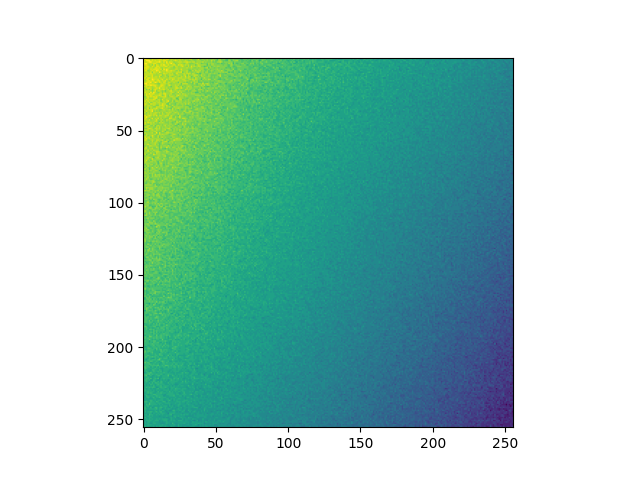

In [10]:
plt.figure()
plt.imshow(centers[...,0])

In [11]:
np.save("./shift_row",  centers[...,0])
np.save("./shift_column", centers[...,1])